# Import necessary libraries

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv("E:\\codsoft Data science\\sales data\\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [77]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [78]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Sales by Media Type')

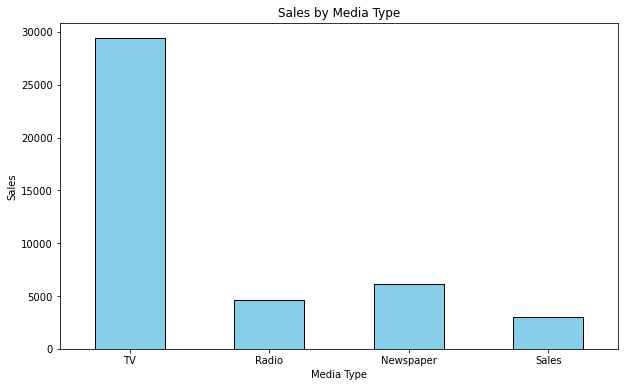

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
df.sum().plot(kind='bar', ax=ax, rot=0, color='skyblue', edgecolor='black')
plt.xlabel('Media Type')
plt.ylabel('Sales')
plt.title('Sales by Media Type')

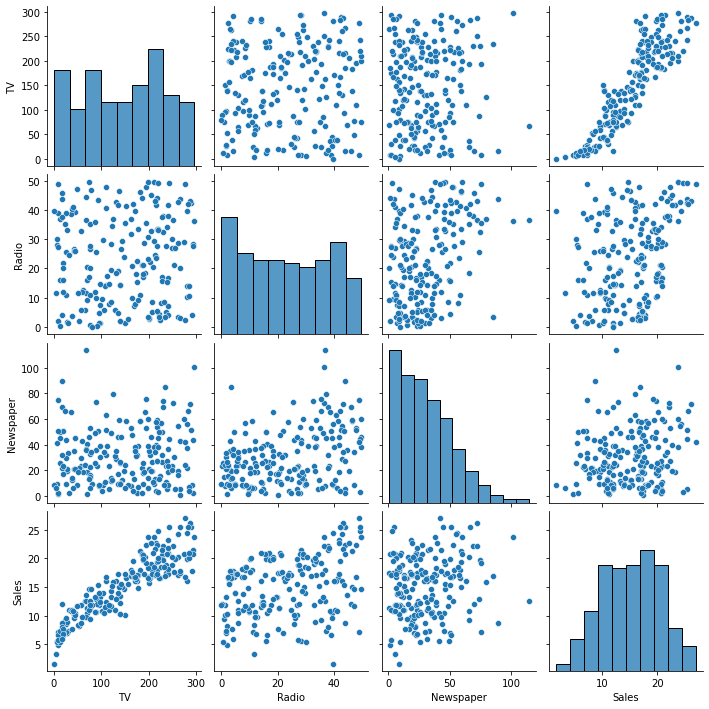

In [80]:
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])

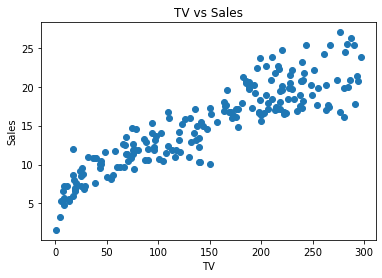

In [81]:
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

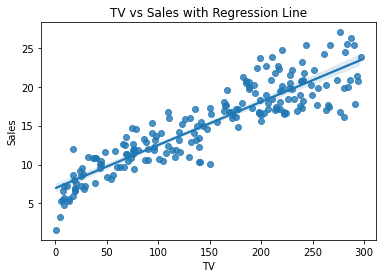

In [82]:
sns.regplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales with Regression Line')
plt.show()

<Figure size 720x576 with 0 Axes>

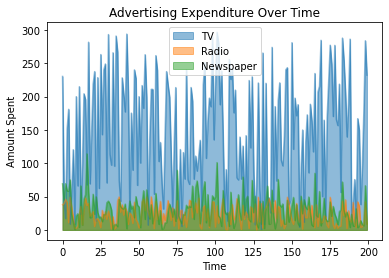

In [83]:
plt.figure(figsize=(10, 8))
df[['TV', 'Radio', 'Newspaper']].plot(kind='area', stacked=False, alpha=0.5)
plt.title('Advertising Expenditure Over Time')
plt.ylabel('Amount Spent')
plt.xlabel('Time')
plt.show()

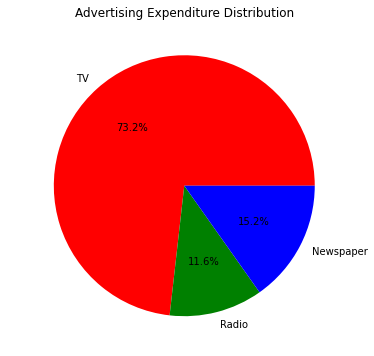

In [84]:
plt.figure(figsize=(10, 6))
df[['TV', 'Radio', 'Newspaper']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Advertising Expenditure Distribution')
plt.ylabel(" ")
plt.show()

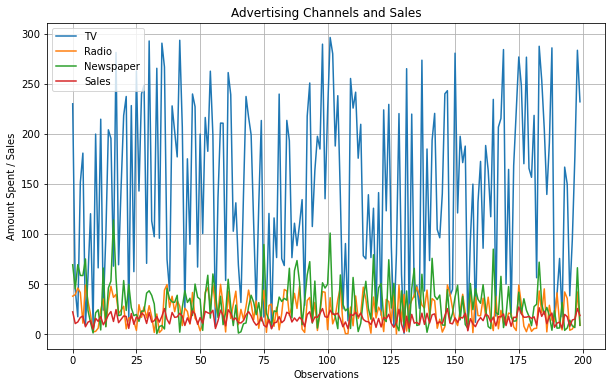

In [85]:
columns_to_plot = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(10, 6))  
for column in columns_to_plot:
    plt.plot(df[column], label=column)

plt.title('Advertising Channels and Sales')
plt.xlabel('Observations')
plt.ylabel('Amount Spent / Sales')
plt.legend()
plt.grid(True)
plt.show()

# Correlation matrix to identify relationships

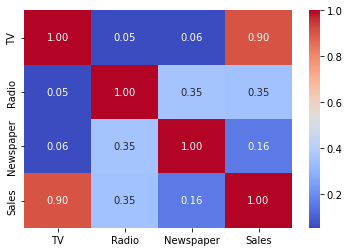

In [86]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [87]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model

In [90]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test_scaled)

In [92]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.907756910271092
R-squared: 0.9059011844150826


# Visualization of actual vs predicted sales

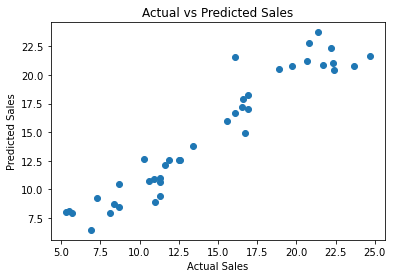

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


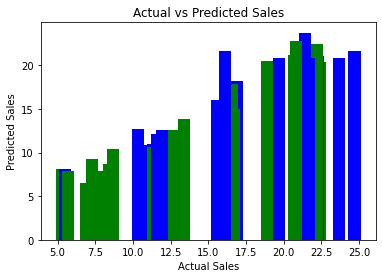

In [94]:
plt.bar(y_test, y_pred,color=["blue","green"])
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
